In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [14]:
data = pd.read_csv('~/Datasets/rossmann.csv')

In [15]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [16]:
data.shape

(1017209, 9)

In [26]:
store1_data = data.loc[(data['Store']==1)]

In [18]:
## how many unique values are there in the column?
data['Store'].nunique()

1115

In [19]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month

In [13]:
import seaborn as sb


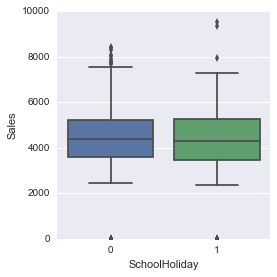

In [27]:
sb.factorplot(x ='SchoolHoliday',
             y = 'Sales',
             data=store1_data,
             kind='box')

In [28]:
store1_open_data = store1_data[store1_data.Open==1]

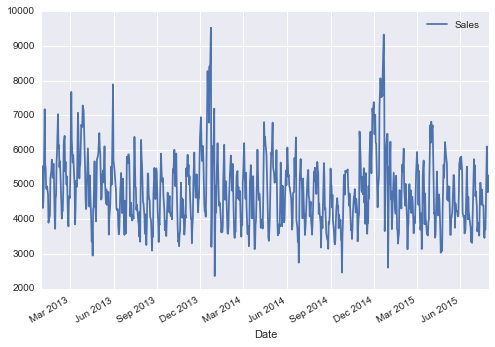

In [29]:
store1_open_data[['Sales']].plot()

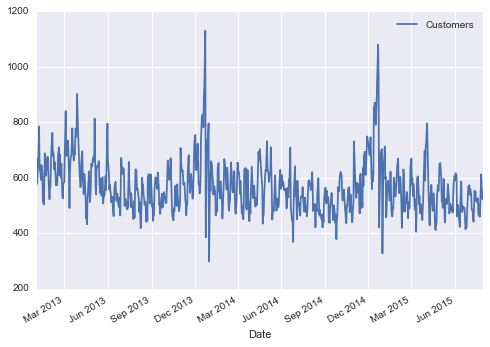

In [30]:
store1_open_data[['Customers']].plot()

In [32]:
data['Sales'].resample('D').mean().autocorr(lag=1)  ## lag is the time span that it is correlated over (1 day here)
## not a lot of correlation between a given day and the sales one day prior. There is a lot of variation across days
## so this is not very surprising

-0.025858276006383577

In [34]:
## much higher correlation across same days of the week (day lag=7)
data['Sales'].resample('D').mean().autocorr(lag=7)

0.55748935887396067

In [35]:
data['Customers'].resample('D').mean().autocorr(lag=1)

-0.095131583909775344

In [36]:
data['Customers'].resample('D').mean().autocorr(lag=7)

0.70275203581955981

### Rolling averages

In [37]:
data[['Sales']].resample('M').apply([np.mean, np.median]).head()

Sales        
                   mean  median
Date                           
2013-01-31  5211.555578  5194.0
2013-02-28  5494.371397  5421.5
2013-03-31  5820.349168  5844.0
2013-04-30  5483.749836  5464.0
2013-05-31  5364.127383  5585.0

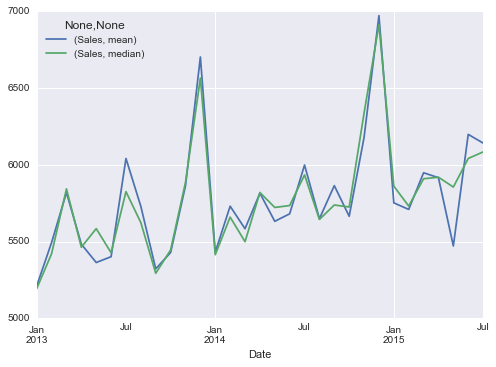

In [38]:
data[['Sales']].resample('M').apply([np.mean, np.median]).plot()

In [40]:
daily_store_sales = data[['Sales']].resample('D').sum()
daily_store_sales.rolling(window=3, center=True).mean().head().reset_index()

,Date,Sales
0,2013-01-01,NaN
1,2013-01-02,4.464961e+06
2,2013-01-03,6.645534e+06
3,2013-01-04,6.312789e+06
4,2013-01-05,4.244817e+06


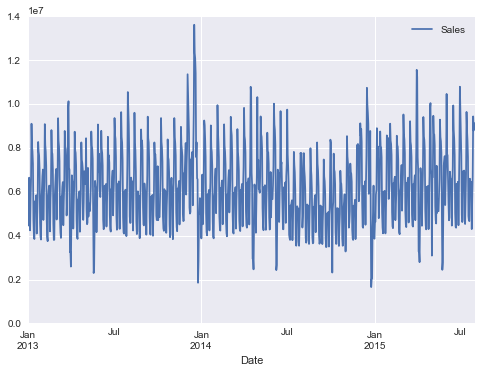

In [42]:
daily_store_sales.rolling(window=3, center=True).mean().plot()

In [41]:
daily_store_sales.rolling(window=10, center=True).mean().head().reset_index()

,Date,Sales
0,2013-01-01,NaN
1,2013-01-02,NaN
2,2013-01-03,NaN
3,2013-01-04,NaN
4,2013-01-05,NaN


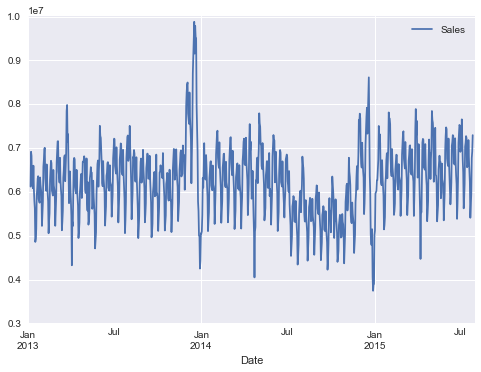

In [43]:
daily_store_sales.rolling(window=10, center=True).mean().plot()

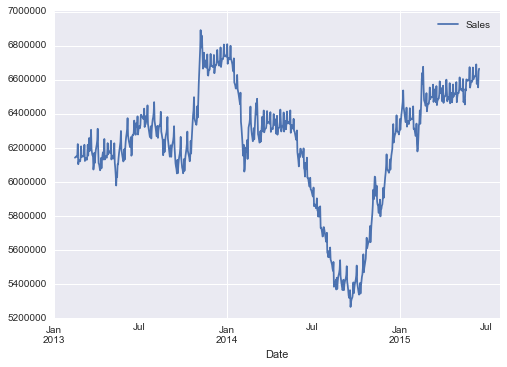

In [44]:
daily_store_sales.rolling(window=90, center=True).mean().plot()

In [46]:
daily_store_sales['Sales'].diff(periods=1).head()

Date
2013-01-01          NaN
2013-01-02    6852594.0
2013-01-03    -602009.0
2013-01-04     291134.0
2013-01-05    -687361.0
Freq: D, Name: Sales, dtype: float64

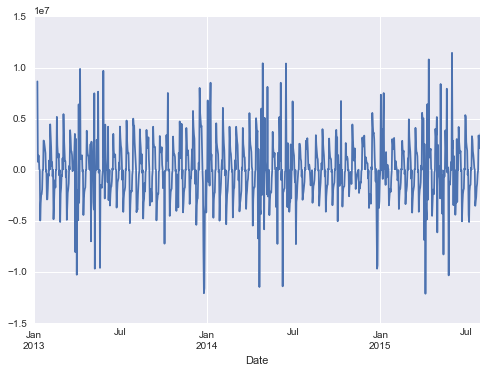

In [48]:
## shows the difference between a given day's sales and the sales of one week prior
daily_store_sales['Sales'].diff(periods=7).plot()

### Sales by month, compare effect of promotions

In [52]:
sales_by_month_noprom = data.loc[(data['Promo']==0), 'Sales'].resample('M').mean()

In [51]:
sales_by_month_noprom.head()

Date
2013-01-31    96969977
2013-02-28    86960640
2013-03-31    73428141
2013-04-30    81415390
2013-05-31    82434542
Freq: M, Name: Sales, dtype: int64

In [53]:
sales_by_month_prom = data.loc[(data['Promo']==1), 'Sales'].resample('M').mean()

In [54]:
sales_by_month_prom.head()

Date
2013-01-31    7458.495964
2013-02-28    7585.079372
2013-03-31    7638.399283
2013-04-30    7624.517339
2013-05-31    7104.278786
Freq: M, Name: Sales, dtype: float64

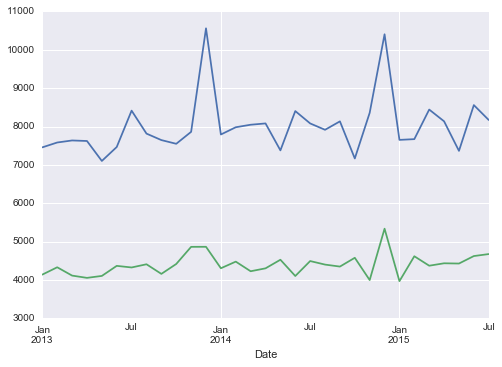

In [58]:
sales_by_month_prom.plot()
sales_by_month_noprom.plot()

### are sales more correlated with the prior date, a similar date last year, or a similar data last month?

In [62]:
def autocorrelate(daily_series, number_of_days):
    return daily_series['Sales'].autocorr(lag=number_of_days)

autocorrelate(daily_store_sales, 1)

-0.025245571807191617

In [63]:
autocorrelate(daily_store_sales, 365)

0.0068408670083074646

In [65]:
autocorrelate(daily_store_sales, 28)

0.72310245891250235

In [66]:
autocorrelate(daily_store_sales, 2)

-0.071002078118211021

In [67]:
autocorrelate(daily_store_sales, 30)

-0.11789915468106721

In [68]:
autocorrelate(daily_store_sales, 7)

0.55223707546056189

### 28-day rolling mean of customers

In [73]:
## total customers across all stores each day
daily_total_customers = data['Customers'].resample('D').sum()

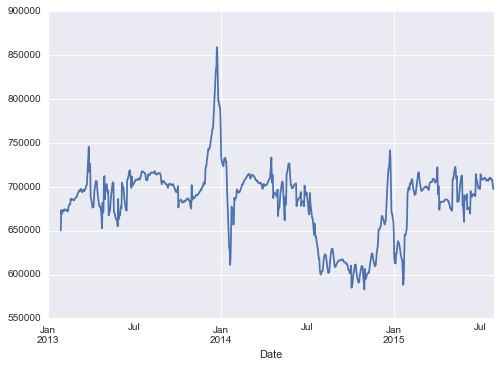

In [74]:
daily_total_customers.rolling(28).mean().plot()

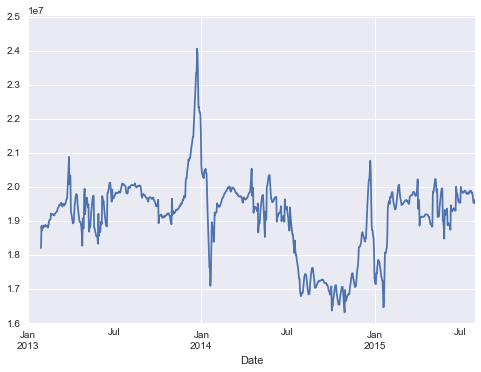

In [75]:
daily_total_customers.rolling(28).sum().plot()

### Identify the date with largest drop in sales from the same date in the previous month

In [76]:
## diff month
## call min
monthly_sales = data['Sales'].resample('M').sum()

In [96]:
monthly_sales.diff(periods=1).sort_values(ascending=True).head(1)

Date
2014-01-31   -43957774.0
Name: Sales, dtype: float64

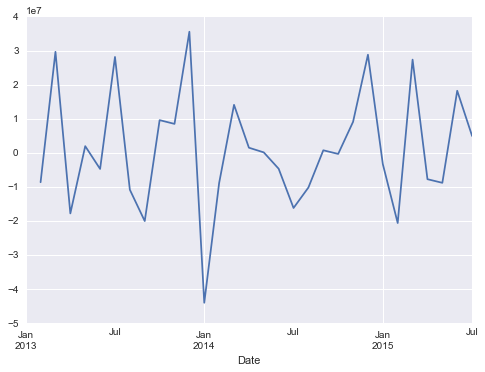

In [93]:
monthly_sales.diff(periods=1).plot()

### Compute the total sales up until Dec. 2014

In [97]:
data['Sales'].expanding().sum()

Date
2015-07-31    5.263000e+03
2015-07-31    1.132700e+04
2015-07-31    1.964100e+04
2015-07-31    3.363600e+04
2015-07-31    3.845800e+04
2015-07-31    4.410900e+04
2015-07-31    5.945300e+04
2015-07-31    6.794500e+04
2015-07-31    7.651000e+04
2015-07-31    8.369500e+04
2015-07-31    9.415200e+04
2015-07-31    1.031110e+05
2015-07-31    1.119320e+05
2015-07-31    1.184760e+05
2015-07-31    1.276670e+05
2015-07-31    1.378980e+05
2015-07-31    1.463280e+05
2015-07-31    1.563990e+05
2015-07-31    1.646330e+05
2015-07-31    1.742260e+05
2015-07-31    1.837410e+05
2015-07-31    1.903070e+05
2015-07-31    1.975800e+05
2015-07-31    2.117700e+05
2015-07-31    2.259500e+05
2015-07-31    2.337680e+05
2015-07-31    2.469810e+05
2015-07-31    2.542820e+05
2015-07-31    2.636930e+05
2015-07-31    2.684690e+05
                  ...     
2013-01-01    5.873175e+09
2013-01-01    5.873175e+09
2013-01-01    5.873175e+09
2013-01-01    5.873175e+09
2013-01-01    5.873175e+09
2013-01-01    5.873175e

### When were the largest differences between 15-day moving/rolling averages? HINT: Using rolling and diff